In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [23]:
data = pd.read_csv('../../data/panel_data.csv')
data.head()

,time,state,t2m,tp,lai_hv,lai_lv,cases,deaths
0,2020-01-01,TIBESTI,13.226863,0.006183,0.010336,0.264653,15.0,0.0
1,2020-01-01,BORKOU,17.938311,0.001743,0.013868,0.356516,80.0,0.0
2,2020-01-01,ENNEDI OUEST,14.834963,0.001229,0.053228,0.344716,58.0,0.0
3,2020-01-01,WADI FIRA,18.471732,0.001052,0.268617,0.859191,600.0,0.0
4,2020-01-01,SALAMAT,25.261679,0.001052,0.567471,1.311763,621.0,3.0


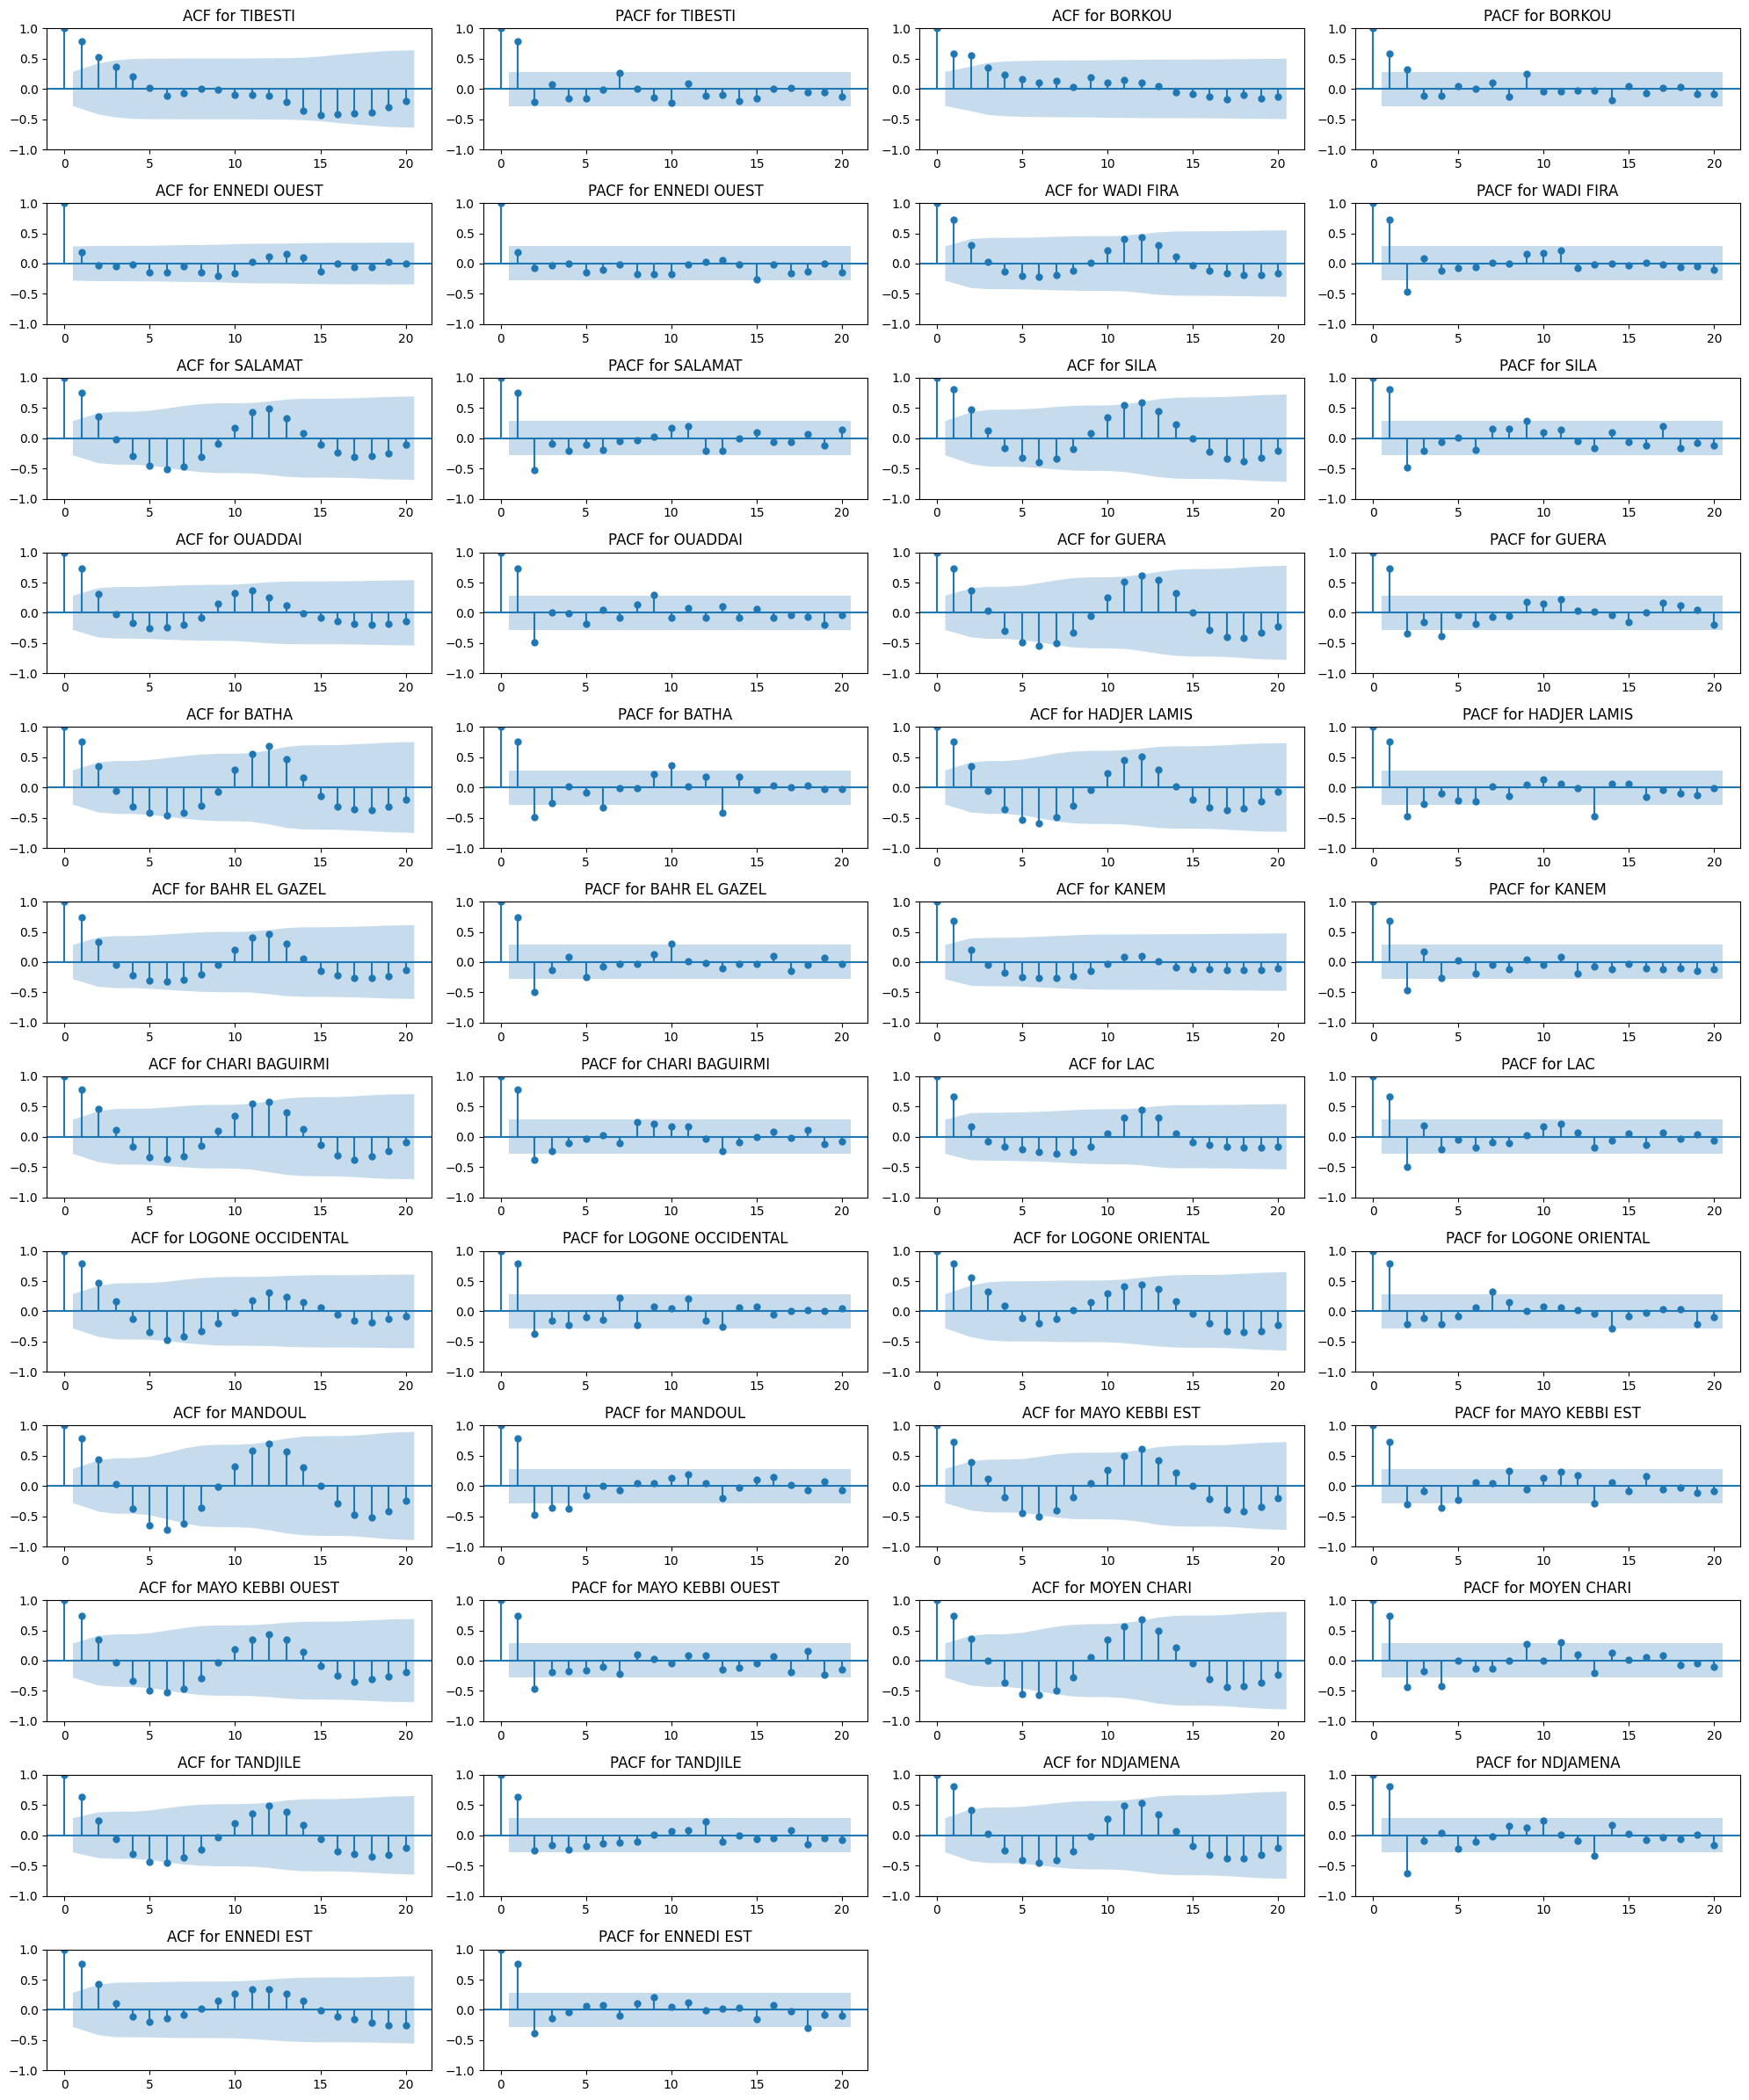

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming df is your dataframe with 'time', 'entity', and 'cases' columns
entities = data['state'].unique()  # Get unique entities in the panel
n_entities = len(entities)  # Number of entities
ncols = 4  # Number of columns in the plot grid
nrows = (n_entities * 2 // ncols) + (n_entities * 2 % ncols > 0)   # Number of rows

# Create subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, nrows * 2))  # Adjust figure size as needed
axs = axs.flatten()  # Flatten the 2D array of axes to iterate easily

for i, entity in enumerate(entities):
    entity_data = data[data['state'] == entity].sort_values(by='time')['cases']  # Filter and sort data by time
    
    # Plot ACF
    plot_acf(entity_data, lags=20, ax=axs[i * 2])  # ACF plot
    axs[i * 2].set_title(f'ACF for {entity}')
    
    # Plot PACF
    plot_pacf(entity_data, lags=20, ax=axs[i * 2 + 1])  # PACF plot
    axs[i * 2 + 1].set_title(f'PACF for {entity}')

# Remove any unused subplots (if nrows * ncols > number of plots)
for j in range(i * 2 + 2, nrows * ncols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.savefig('../../docs/acf-pacf.png', format='png', bbox_inches='tight', pad_inches=0)
plt.show()